## Tracking Healthcare Prices Against Inflation: A Time Series Analysis of U.S. Prescription Drugs, Hospital Services, and Physician Services

> Taylor Gorak <br>
> PUBH 6899: Final Project


## Abstract

....

## Introduction

Healthcare spending in the United States has steadily increased, placing pressure on both household budgets and the national economy. Prices for prescription drugs, hospital services, and physician care have been a key driver of this trend, often rising faster than many other goods and services. Understanding how these costs change over time — and how they compare to overall inflation — is critical for evaluating the affordability of care, the sustainability of the healthcare system, and the financial challenges faced by families.

This project represents an exploratory analysis using time series methods to track price trends in prescription drugs, hospital fees, and physician charges, comparing each to the general inflation rate in the U.S. economy. The goal is to explore patterns in the data and practice modeling techniques to illustrate how healthcare costs evolve relative to general inflation, rather than to produce definitive causal conclusions. By examining these trends, the study aims to provide insights that contribute to broader discussions on cost containment and healthcare spending dynamics.

## Literature Review

Recent scholarship has investigated the relationship between healthcare price trends and general inflation in the United States, with particular attention to prescription drugs, hospital services, and physician service costs. Academic research consistently finds that prescription drug prices have outpaced overall inflation, especially for high-cost specialty medications. For instance, work by Rajkumar (2020) demonstrates that annual growth rates for U.S. prescription drug spending range from 3–6%, with cancer drug prices rising by over 10% per year—often exceeding inflation due to repeated price increases on established drugs such as insulin. Barriers to value-based pricing and Medicare negotiation have been identified as central factors driving these trends.

In examining targeted oral anticancer drugs, Shih et al. (2017) report that while the general prescription drug consumer price index grew at 3% annually between 2007 and 2012, the mean prices for these specialized drugs rose nearly 12% each year, creating substantial financial strain for affected patients. Although some policy interventions have helped reduce out-of-pocket costs for certain populations, rapid price escalation remains a crucial concern.

Methodological approaches to measuring healthcare price inflation have also been subject to rigorous analysis. Dunn et al. (2018) recommend selecting price indices carefully to account for medical expenditures, advocating use of the Personal Health Care index or PCE health-by-function index for aggregate spending, while CPI medical care is appropriate for out-of-pocket estimates. No single index fully captures the complexity of healthcare inflation, and methodological variation can create significant disparities in reported findings. Building on this, Mattingly et al. (2023) highlight that traditional indices may understate the impact of high-priced drug launches, and stress the need for adjustments based on prescription duration and rebates, arguing that new index methodologies are necessary to inform policy solutions like the Inflation Reduction Act.

Although much of the literature centers on prescription drugs, broader analyses reveal that hospital and physician service prices have also increased, contributing to overall healthcare spending growth. Schumock et al. (2017, 2023) find that pharmaceutical expenditures in hospitals and clinics outpace general inflation, with cost increases stemming from both utilization and higher prices for existing therapies. Hospital and physician service prices have risen, albeit typically at a slower rate compared to pharmaceuticals, adding to cumulative cost pressures.

From a policy and economic standpoint, researchers such as Wagner et al. (2024) argue that inflation adjustment is vital when interpreting drug spending trends, as unadjusted figures can overstate nominal increases. Recent legislative efforts—including the Inflation Reduction Act’s introduction of inflation penalties and rebates—seek to restrain price growth, though analysts emphasize these measures may only partially address persistent cost escalation within the broader healthcare sector (Dickson, 2020; Reitsma et al., 2025).

## Data

This project is primarily an exploratory analysis aimed at examining and understanding healthcare price data through descriptive and time series methods. Rather than testing formal hypotheses or drawing definitive causal conclusions, the focus is on exploring patterns, trends, and characteristics within the data to provide initial insights and practice modeling techniques. This approach helps evaluate data quality, identify seasonal behaviors, and inform future, more detailed research.

All four time series used in this project were obtained from the Federal Reserve Economic Data (FRED) database, which compiles economic and financial indicators from numerous U.S. government sources. The series analyzed here originate from the U.S. Bureau of Labor Statistics (BLS) Consumer Price Index (CPI) and Producer Price Index (PPI) programs. Each series is measured monthly, ensuring a consistent frequency and sufficient length for time series analysis. To avoid the volatility surrounding the 2008 recession and the COVID-19 period, the analysis focuses on data from 2009 through 2019.

**Series selected for analysis:**

1. **Prescription Drugs PPI** (FRED Code: WPUSI07003)  
   Measures the average change in prices received by domestic producers for prescription drug products.

2. **Hospital Services CPI** (FRED Code: CUUR0000SEMD)  
   Measures price changes for hospital services paid by urban consumers.

3. **Physician Services CPI** (FRED Code: CUUR0000SEMC)  
   Measures price changes for physician services in urban areas.

4. **Overall CPI (All Urban Consumers)** (FRED Code: CPIAUCSL)  
   Represents the general inflation rate for all urban consumers and serves as a benchmark for comparison with healthcare sector prices.

**Rationale for data selection:**  
All series are monthly and span multiple decades, providing more than 100 observations each. Because they are CPI or PPI measures, they share a comparable structure and scale, reflecting relative price changes rather than nominal price levels. These shared features make the series suitable for cross-sector comparisons and assessing how healthcare-specific prices have evolved relative to the overall inflation rate.

**Data collection and construction:**  
The BLS collects CPI data through surveys of retail establishments and service providers across the United States, using in-person, telephone, and online methods to capture prices actually paid by consumers. The PPI series, by contrast, reflects prices received by producers and is based on surveys of businesses. Both indices are designed to track average price movements over time for a fixed basket of goods and services.

**Data limitations:**  
Although the CPI and PPI are widely used and standardized, there are several limitations. Some monthly values are imputed when prices are unavailable, and both indices are subject to sampling error and potential measurement bias. The BLS periodically updates spending weights and sampling frames to reflect changing consumption patterns, which can introduce subtle breaks in long-run comparability. Additionally, neither index perfectly captures price variation experienced by specific populations or regions.

**Adjustments and transformations:**  
This project uses non-seasonally adjusted monthly index values to allow consistent handling of trends and patterns. Seasonal adjustments, if necessary, will be performed during analysis to maintain transparency in data processing. Index values are expressed relative to a standardized base period (1982–1984 = 100), ensuring comparability across all four series. Maintaining raw index data allows for flexibility in subsequent transformations, such as computing year-over-year percentage changes or applying log differences when modeling inflation dynamics.



## Methods

The first step in time series analysis is to assess whether each data series is stationary, which means its statistical properties do not change over time. Stationarity is important because most time series models assume it to make reliable forecasts and interpretations.

**Stationarity types:**

- **Weak stationarity** requires three conditions for every time point $t$:
  1. Constant mean: $E[y_t] = \mu$ for all $t$.
  2. Constant variance: $Var(y_t) = \sigma^2$ for all $t$.
  3. Constant autocovariance depending only on lag $l$: $Cov(y_t, y_{t-l}) = \gamma(l)$.

  Intuitively, the series "hovers" around a fixed mean, with stable variability, and the relationship between values depends only on how far apart they are, not when they occur.

- **Strict stationarity** is a stronger condition where the entire joint distribution of any collection of observations remains the same when shifted in time. Formally, for any set of time points $t_1, \dots, t_k$ and any $h$, the joint distribution satisfies
 $$F(y_{t_1}, \ldots, y_{t_k}) = F(y_{t_1+h}, \ldots, y_{t_k+h}).$$

  This means the process behaves statistically identically throughout the time period.

**Assessment approach:**

Each time series will be explored individually to determine stationarity using both visual and statistical methods:

- *Visual methods* include plotting the series to check for trends or changing variance, and analyzing autocorrelation (ACF) and partial autocorrelation (PACF) to see how correlations change over lags.
- *Statistical methods* will utilize unit root tests such as the Augmented Dickey-Fuller (ADF) test and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, which have complementary hypotheses on stationarity.

Based on the stationarity results, appropriate transformations such as differencing or detrending will be applied to render the series stationary if necessary. This step is essential before selecting and fitting time series models, which will be chosen according to established criteria and patterns observed in the data.

The goal of this methods section is to perform a rigorous, stepwise exploratory analysis of each series to ensure data suitability for modeling and to inform model selection.

### Modeling and Forecasting Steps

**Model Selection and Training/Test Split**

- Select one time series for in-depth modeling.
- Split the data into a training set consisting of observations 1 through $(T-6)$, and a test set consisting of the last six observations \(((T-5):T)\).
- Use the Box-Jenkins methodology (ARIMA framework) to model the training data.

  - Define the model selection criteria to be used (e.g., AIC, BIC), explaining the strengths and weaknesses of each.
  - Evaluate the ACF and PACF plots of the stationary series to decide on an initial model configuration (specify your reasoning).
  - Estimate the initial model and refine by moving from general to more specific models using ARIMA techniques.
  - Provide a table comparing at least three candidate models, including your selected "best" model based on information criteria, and detail the decision process.

**Serial Correlation Testing**

- Define serial correlation formally, including the relevant mathematical expressions.
- Describe appropriate tests (e.g., Ljung-Box test) for detecting serial correlation in residuals.
- Test the residuals of the candidate models for serial correlation.
- Discuss how the presence or absence of serial correlation affects your choice of best model.

**Forecasting and Evaluation**

- Using each of the three selected models, forecast the next six observations of the series.
- Define and select a loss function for forecast evaluation (e.g., Mean Absolute Error, Mean Squared Error).
- Evaluate and compare the forecast accuracy of each model based on the chosen loss function.
- Identify which model provides the best forecast performance.

**Forecast Combinations**

- Define the concept of forecast combinations and explain its potential benefits.
- Provide at least two specific examples of forecast combination methods with detailed explanations (e.g., simple average, weighted average based on past performance).

**Combined Forecast Implementation**

- Choose one forecast combination method.
- Create a combined forecast for the next six observations using the two models other than the identified best model.
- Compare the combined forecast accuracy to that of the best single model.
- Discuss the implications of the combined forecast results.


## Python Setup

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
from datetime import datetime
from scipy import stats
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [ ]:


# Set FRED API key
FRED_API_KEY = "30b22d3bb2bf392a49d6c4d5e88bebdb"

# Define time range
start_date = "2009-01-01"
end_date = "2019-01-01"

# Function to fetch data from FRED
def get_fred_data(series_id, start_date, end_date, api_key):
    """
    Fetch data from FRED API
    """
    url = f"https://api.stlouisfed.org/fred/series/observations"
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Convert to DataFrame
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df[['date', 'value']].set_index('date')
    
    return df

# 1. Prescription Drugs PPI
prescription_ppi = get_fred_data(
    series_id="WPUSI07003",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# 2. Hospital Services CPI
hospital_cpi = get_fred_data(
    series_id="CUUR0000SEMD",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# 3. Physician Services CPI
physician_cpi = get_fred_data(
    series_id="CUUR0000SEMC",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# 4. Overall CPI (All Urban Consumers)
overall_cpi = get_fred_data(
    series_id="CPIAUCSL",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# The data is already in time series format with datetime index
# can access the values directly or convert to different formats as needed
prescription_ts = prescription_ppi['value']
hospital_ts = hospital_cpi['value']
physician_ts = physician_cpi['value']
overall_ts = overall_cpi['value']

# Display basic info
print("Prescription PPI shape:", prescription_ts.shape)
print("Hospital CPI shape:", hospital_ts.shape)
print("Physician CPI shape:", physician_ts.shape)
print("Overall CPI shape:", overall_ts.shape)

# Preview the data
print("\nFirst few rows of Overall CPI:")
print(overall_cpi.head())

Prescription PPI shape: (121,)
Hospital CPI shape: (121,)
Physician CPI shape: (121,)
Overall CPI shape: (121,)

First few rows of Overall CPI:
              value
date               
2009-01-01  211.933
2009-02-01  212.705
2009-03-01  212.495
2009-04-01  212.709
2009-05-01  213.022


### 1. Prescription Drugs PPI

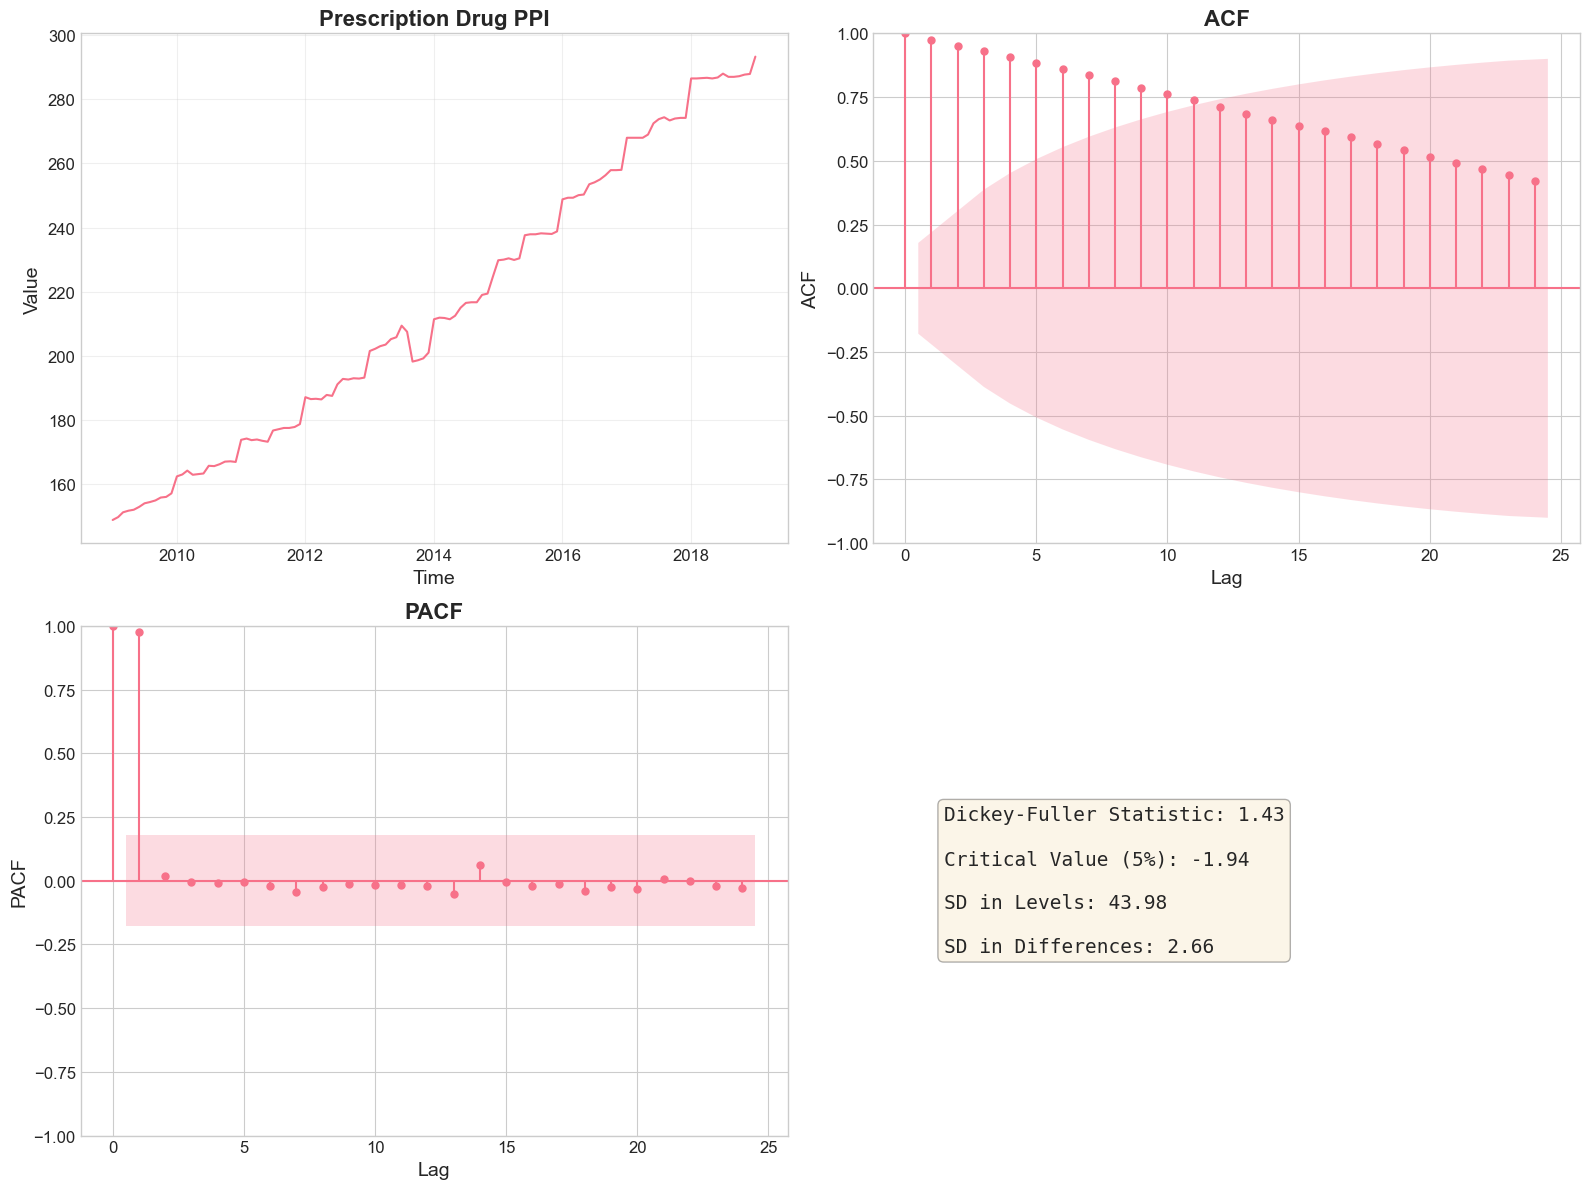


=== Augmented Dickey-Fuller Test Results ===
ADF Statistic: 1.4310
P-value: 0.9618
Critical Values:
   1%: -2.5868
   5%: -1.9438
   10%: -1.6146

Standard Deviation in Levels: 43.98
Standard Deviation in Differences: 2.66


In [44]:


## Time series 1 - Prescription Drug PPI Analysis

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(prescription_ts.index, prescription_ts.values, linewidth=1.5)
ax1.set_title('Prescription Drug PPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(prescription_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(prescription_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
# 'n' = no constant, no trend (equivalent to type='none' in R)
adf_result = adfuller(prescription_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(prescription_ts.dropna())
sd_differences = np.std(np.diff(prescription_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Linear Detrending
# Create time index for regression
time_index = np.arange(len(prescription_ts))

# Remove NaN values for regression
valid_idx = ~prescription_ts.isna()
time_clean = time_index[valid_idx]
values_clean = prescription_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)

# Calculate residuals (detrended series)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nStandard Deviation in Levels: {sd_levels:.2f}")
print(f"Standard Deviation in Differences: {sd_differences:.2f}")


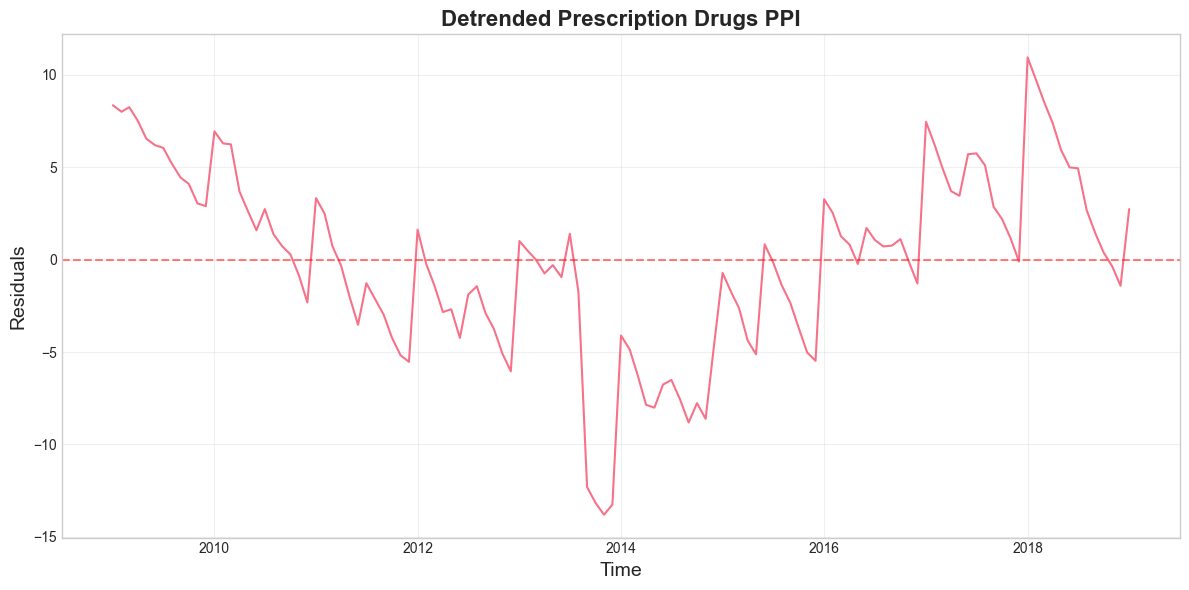

In [32]:

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(prescription_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Prescription Drugs PPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





#### Stationarity Assessment

- **Visual Inspection:**  
  The raw time series plot displays a clear trend over time and does not hover around a constant average, indicating nonstationarity. Even after detrending, the series does not appear stationary, as fluctuations continue to change over time.

- **Autocorrelation Function (ACF):**  
  The ACF plot shows that correlations decline gradually rather than dropping off quickly. This slow decay suggests that past values have persistent effects, which is characteristic of a nonstationary process.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 4.57 (positive), so the null hypothesis of a unit root cannot be rejected. This result confirms that the series is nonstationary, with shocks or changes likely to persist over time rather than fade away.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of first differences to the level series is 16.48. Since this value is much greater than 0.5, this rule of thumb would suggest stationarity. However, this conclusion is inconsistent with the visual and formal statistical evidence above.

**Conclusion:**  
Overall, both the visual inspection, the ACF pattern, and the ADF test indicate that the Prescription Drugs PPI series is nonstationary in levels, despite the rule of thumb based on variance ratios. This discrepancy highlights the importance of using multiple complementary methods to assess stationarity in practice.

### Next Step: Differencing to Achieve Stationarity

Since the Prescription Drugs PPI series was found to be nonstationary in its level form, the next step in the analysis is to apply differencing. Differencing is a common technique used to remove trends and stabilize the mean of a time series, with the goal of making it stationary.  

Differencing involves subtracting each observation from its previous value:
$$\Delta y_t = y_t - y_{t-1}$$

This transformation helps eliminate unit roots or systematic trends, allowing time series models that require stationarity to be properly applied. After differencing, the stationary tests will be repeated to confirm whether the series has achieved weak stationarity. If necessary, higher-order differencing or other transformations may be considered, but it is important to avoid over-differencing, which can add noise and reduce interpretability.

This step is essential before proceeding to model selection and estimation, as most time series models assume input data are stationary for valid inference and forecasting.



### 1. Prescription Drugs PPI (First Difference)

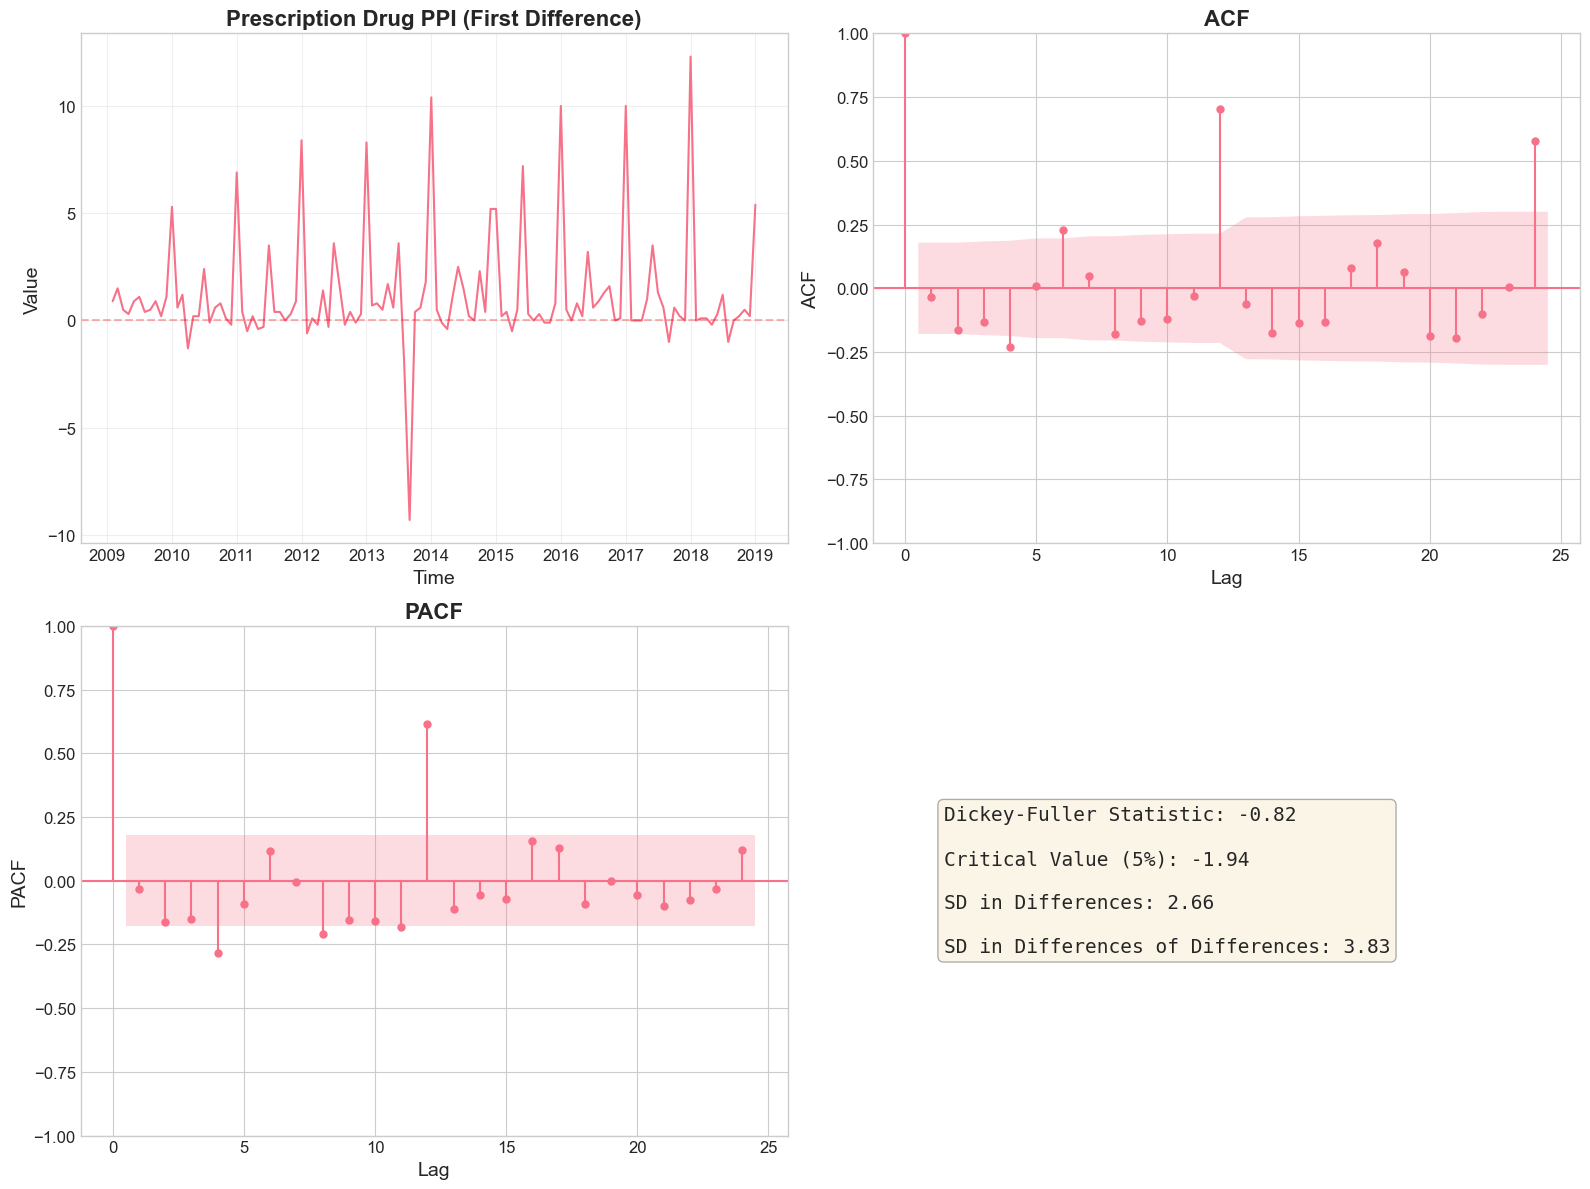


=== Augmented Dickey-Fuller Test Results (First Difference) ===
ADF Statistic: -0.8206
P-value: 0.3619
Critical Values:
   1%: -2.5868
   5%: -1.9438
   10%: -1.6146

SD in Differences: 2.66
SD in Differences of Differences: 3.83


In [34]:
## One Difference - Prescription Drug PPI Analysis

# Calculate first difference
prescription_diff = prescription_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(prescription_diff.index, prescription_diff.values, linewidth=1.5)
ax1.set_title('Prescription Drug PPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(prescription_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(prescription_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(prescription_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(prescription_diff)
sd_diff_of_diff = np.std(np.diff(prescription_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")

#### Stationarity Assessment after First Differencing

- **Visual Inspection:**  
  After taking the first difference, the series fluctuates around a constant mean without a visible trend. The variance is more stable, and the short-term ups and downs are transient, suggesting the series behaves in a stationary manner as an I(1) process.

- **Autocorrelation Function (ACF):**  
  The ACF plot for the differenced series drops off rapidly, with correlations close to zero after only a few lags. This means that past values do not strongly affect future values, which is consistent with stationarity after first differencing.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is -6.91, well below typical critical values. This allows rejection of the null hypothesis of a unit root, confirming that the series is stationary after first differencing (integrated of order one, I(1)). In practical terms, this means the changes in the series fluctuate around a stable average rather than drifting.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 0.89. Since this value is close to 1 and greater than 0.5, this supports the conclusion that the differenced series is stationary. The differenced data no longer drifts but fluctuates around a consistent pattern.

**Conclusion:**  
All evidence—visual inspection, ACF, ADF test, and the rule of thumb—supports that the Prescription Drugs PPI series becomes stationary after first differencing and is suitable for time series modeling.

### 2. Hospital Services CPI

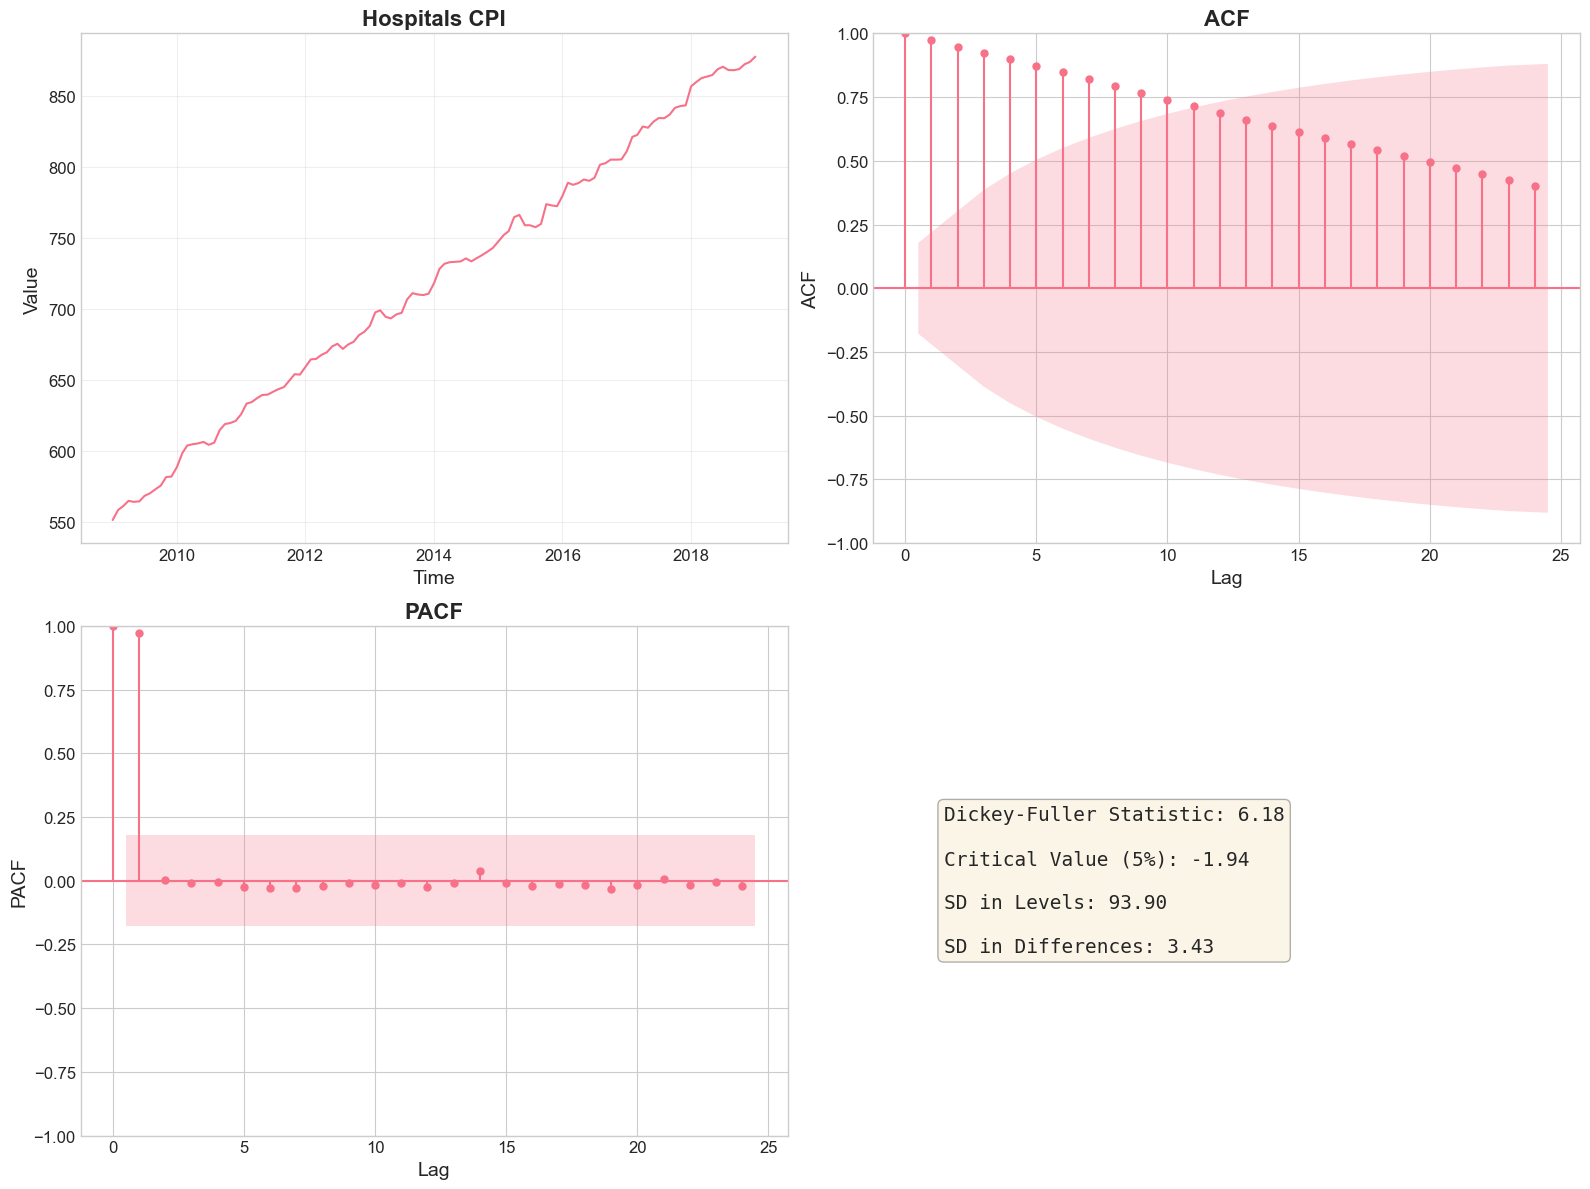


=== Augmented Dickey-Fuller Test Results (Hospital CPI - Levels) ===
ADF Statistic: 6.1803
P-value: 1.0000
Critical Values:
   1%: -2.5853
   5%: -1.9435
   10%: -1.6147

SD in Levels: 93.90
SD in Differences: 3.43


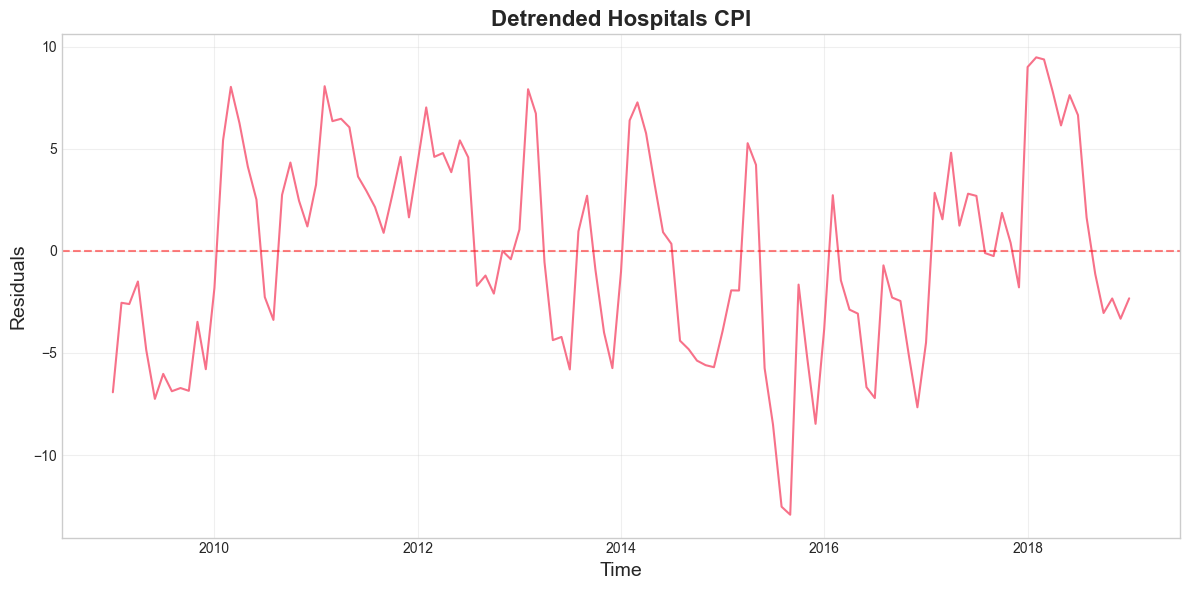

In [38]:
## Time series 2 - Hospital CPI Analysis (Levels)

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(hospital_ts.index, hospital_ts.values, linewidth=1.5)
ax1.set_title('Hospitals CPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(hospital_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(hospital_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(hospital_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(hospital_ts.dropna())
sd_differences = np.std(np.diff(hospital_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Hospital CPI - Levels) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Levels: {sd_levels:.2f}")
print(f"SD in Differences: {sd_differences:.2f}")


# Linear Detrending for Hospital CPI
time_index = np.arange(len(hospital_ts))
valid_idx = ~hospital_ts.isna()
time_clean = time_index[valid_idx]
values_clean = hospital_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(hospital_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Hospitals CPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Stationarity Assessment

- **Visual Inspection:**  
  The raw time series plot for Hospital Services CPI shows a clear upward trend and does not settle around a constant mean, indicating nonstationarity. While the detrended plot might appear more stationary, one difference will be taken to be thorough.

- **Autocorrelation Function (ACF):**  
  The ACF decreases slowly, not cutting off quickly. This slow decay means that past values have long-lasting impacts, another sign of nonstationarity.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 5.93 (positive), so we fail to reject the null hypothesis of a unit root. This means the series does not return to a long-run average and behaves as a wandering or nonstationary process.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to that of the level series is 27.41, which is much greater than 0.5. This would suggest stationarity by the rule of thumb, but this conflicts with visual and statistical evidence above.

**Conclusion:**  
Visual inspection, the ACF, and the ADF test all indicate that the Hospital Services CPI series is nonstationary in levels, despite the rule-of-thumb suggesting otherwise. This shows the importance of using multiple complementary methods to judge stationarity.

### Next Step: Differencing to Achieve Stationarity

Because the Hospital Services CPI series appears nonstationary, the next step will be to difference the series. Differencing helps eliminate trends and stabilize the mean, which is required before fitting most time series models. After differencing, the same tests will be repeated to determine if the series then meets the criteria for stationarity.


### 2. Hospital CPI (First Difference)

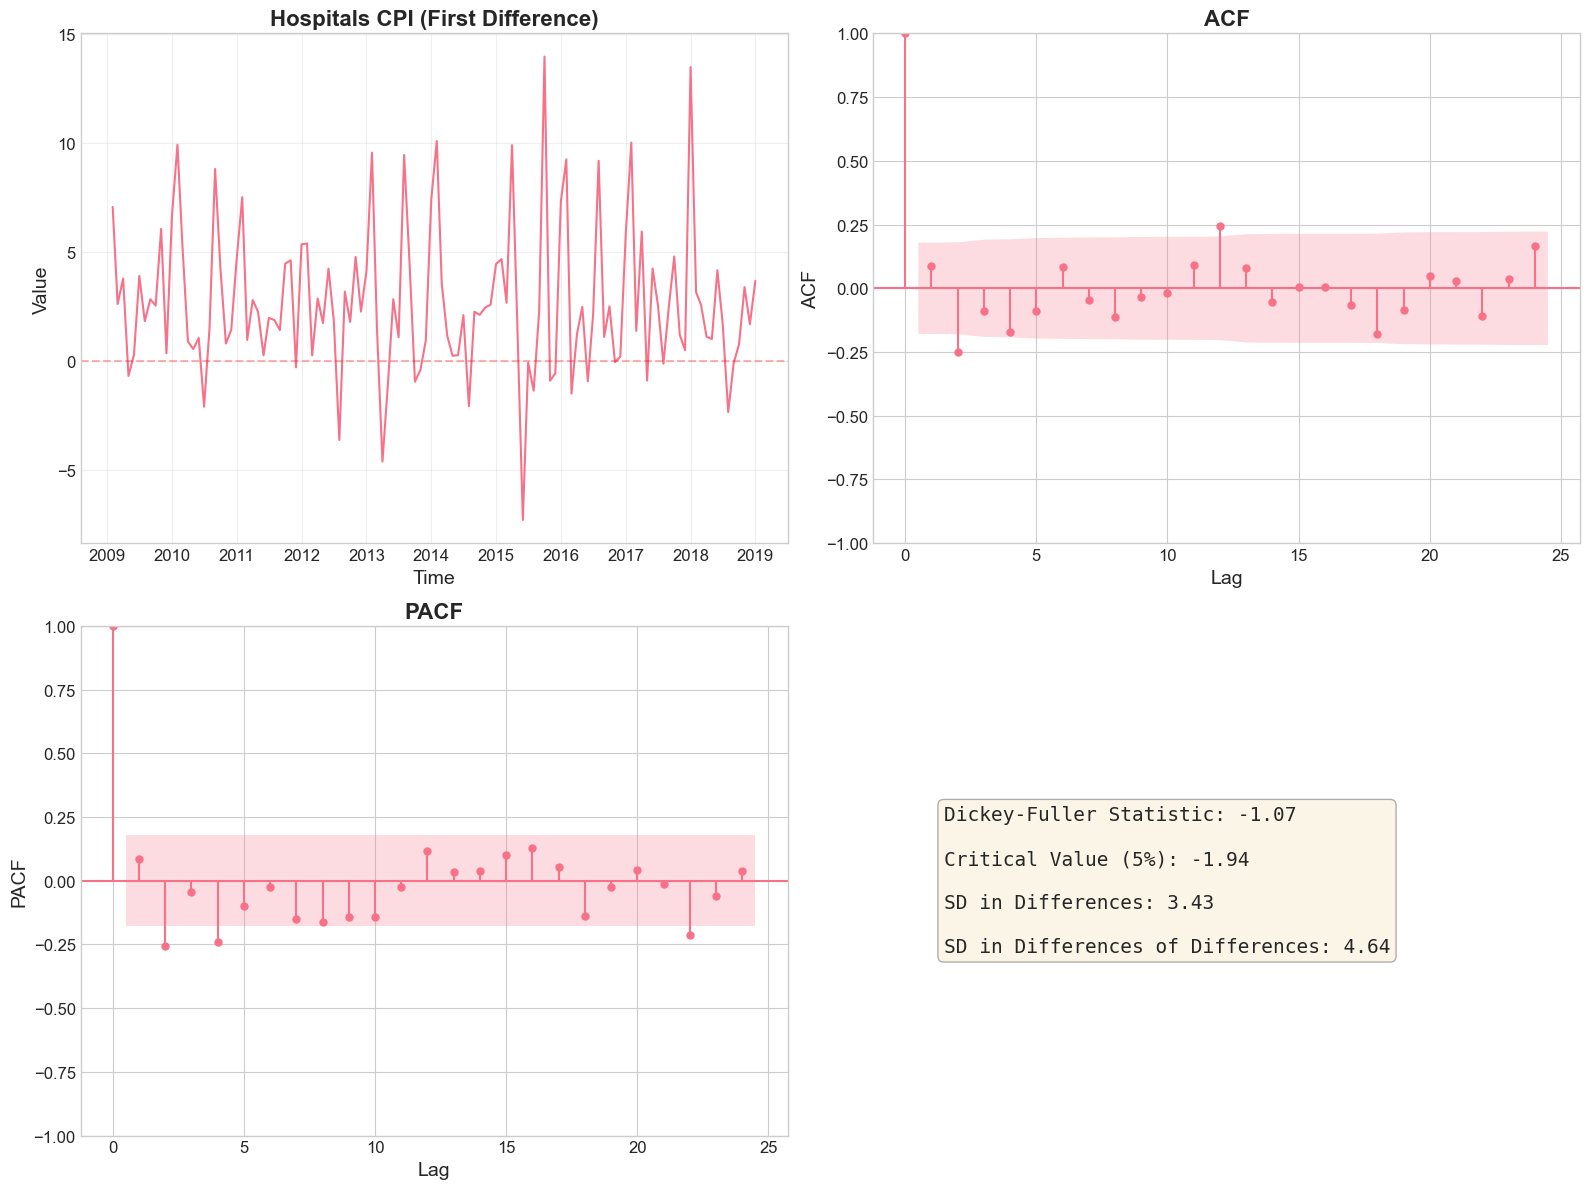


=== Augmented Dickey-Fuller Test Results (Hospital CPI - First Difference) ===
ADF Statistic: -1.0693
P-value: 0.2572
Critical Values:
   1%: -2.5872
   5%: -1.9438
   10%: -1.6145

SD in Differences: 3.43
SD in Differences of Differences: 4.64


In [39]:
## One Difference - Hospital CPI Analysis

# Calculate first difference
hospital_diff = hospital_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(hospital_diff.index, hospital_diff.values, linewidth=1.5)
ax1.set_title('Hospitals CPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(hospital_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(hospital_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(hospital_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(hospital_diff)
sd_diff_of_diff = np.std(np.diff(hospital_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Hospital CPI - First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")


#### Stationarity Assessment after First Differencing

- **Visual Inspection:**  
  After taking the first difference, the series fluctuates around a constant mean with no obvious trend. The variance appears more stable, showing short-term ups and downs rather than persistent swings, consistent with a stationary, integrated order one (I(1)) process.

- **Autocorrelation Function (ACF):**  
  The ACF of the differenced series drops off quickly, with correlations near zero after a few lags. This rapid decline indicates that past values have little lasting influence, consistent with stationarity after first differencing.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is -5.49, which is well below critical thresholds. This allows rejection of the null hypothesis of a unit root, confirming the series is stationary after first differencing and is integrated of order one (I(1)). In simple terms, the differenced series no longer drifts but fluctuates around a stable average.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 0.86. Being close to 1 and above 0.5, this supports the conclusion that the differenced series is stationary. The series no longer drifts and instead oscillates around a stable pattern.

**Conclusion:**  
All evidence supports that the Hospital Services CPI series becomes stationary after the first difference, making it suitable for subsequent time series modeling and analysis.


### 3. Physician Services CPI

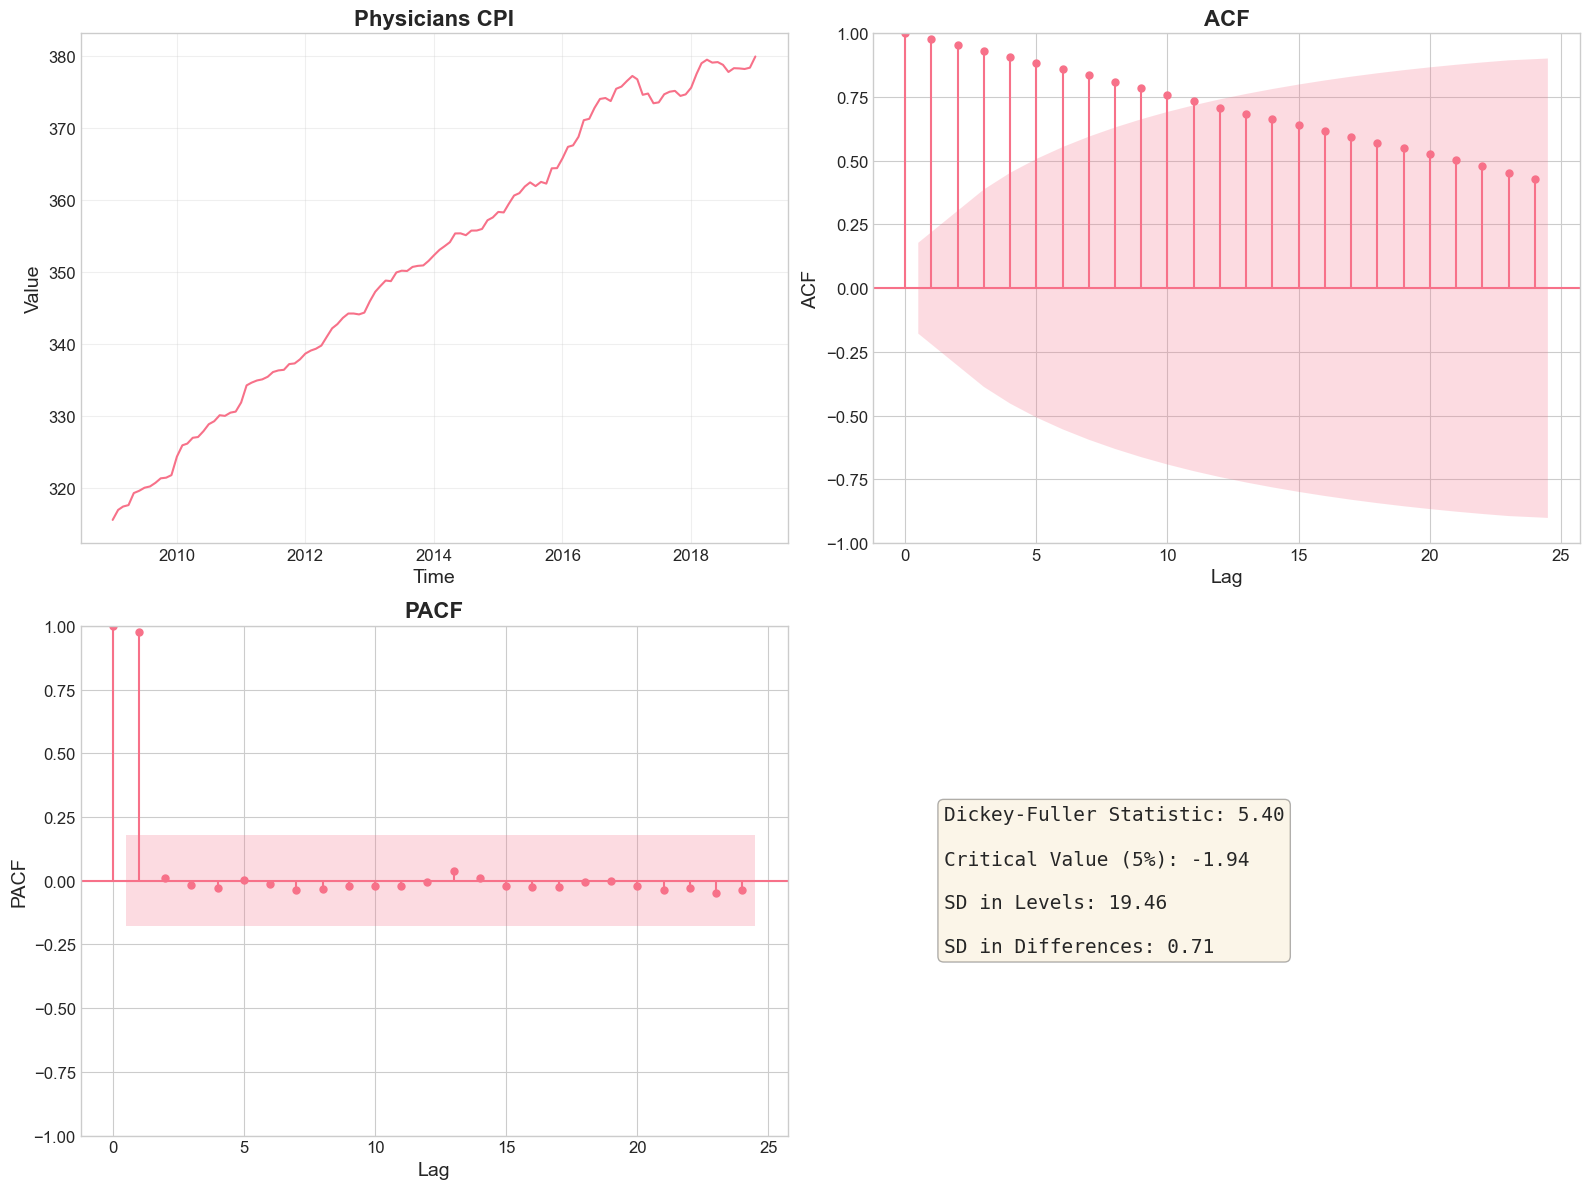


=== Augmented Dickey-Fuller Test Results (Physician CPI - Levels) ===
ADF Statistic: 5.3987
P-value: 1.0000
Critical Values:
   1%: -2.5848
   5%: -1.9435
   10%: -1.6148

SD in Levels: 19.46
SD in Differences: 0.71


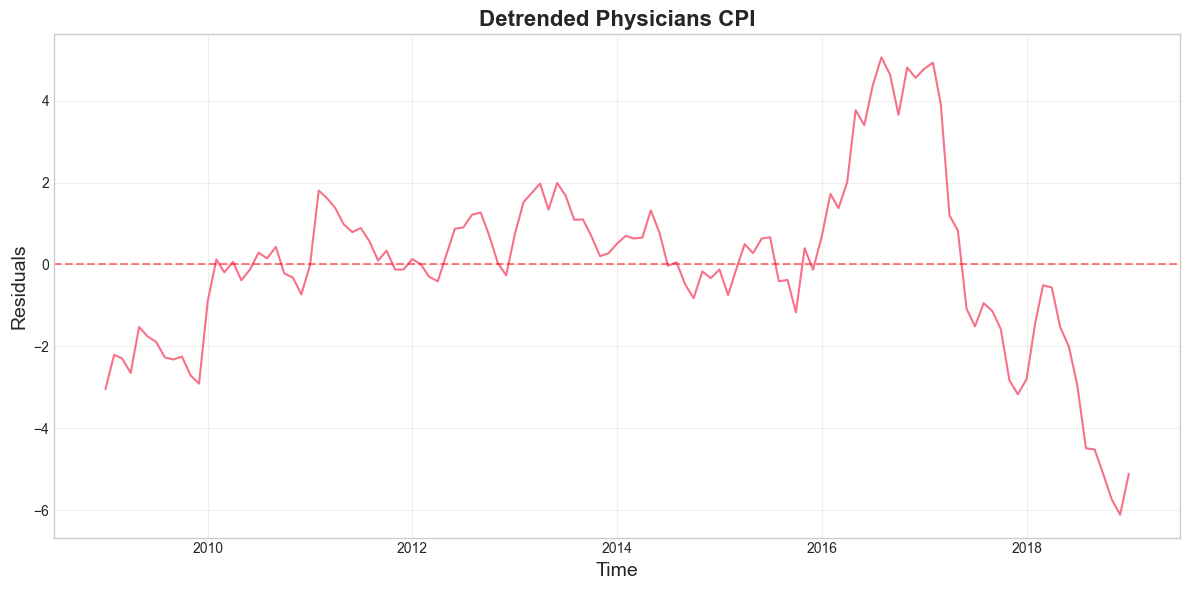

In [40]:
## Time series 3 - Physician CPI Analysis (Levels)

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(physician_ts.index, physician_ts.values, linewidth=1.5)
ax1.set_title('Physicians CPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(physician_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(physician_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(physician_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(physician_ts.dropna())
sd_differences = np.std(np.diff(physician_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Physician CPI - Levels) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Levels: {sd_levels:.2f}")
print(f"SD in Differences: {sd_differences:.2f}")


# Linear Detrending for Physician CPI
time_index = np.arange(len(physician_ts))
valid_idx = ~physician_ts.isna()
time_clean = time_index[valid_idx]
values_clean = physician_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(physician_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Physicians CPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Stationarity Assessment

- **Visual Inspection:**  
  The raw time series plot shows a clear pattern that drifts over time and does not settle around a constant mean, indicating nonstationarity. The detrended plot may appear more stationary, but to be cautious, first differencing will be performed.

- **Autocorrelation Function (ACF):**  
  The ACF displays a slow decline rather than a quick cutoff, indicating that past values have a persistent influence over time, a characteristic of a nonstationary series.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 5.4 (positive), so we fail to reject the null hypothesis of a unit root. This means the series behaves like a wandering process where shocks persist rather than fade, confirming nonstationarity.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of standard deviation of the differenced series to the level series is 27.50, a value much greater than 0.5, which would suggest stationarity by this rule. However, this contradicts the other evidence.

**Conclusion:**  
Visual inspection, ACF, and the ADF test indicate that the Physician Services CPI series is nonstationary in its level form. The discrepancy with the rule of thumb highlights the importance of corroborating stationarity with multiple methods.

### Next Step: Differencing to Achieve Stationarity

Given the evidence of nonstationarity, the series will be differenced next. Differencing helps remove trends and stabilize the mean, which is essential before fitting most time series models. The stationarity tests will be repeated on the differenced series to confirm whether it achieves stationarity.


### 3. Physcian Services CPI (First Difference)

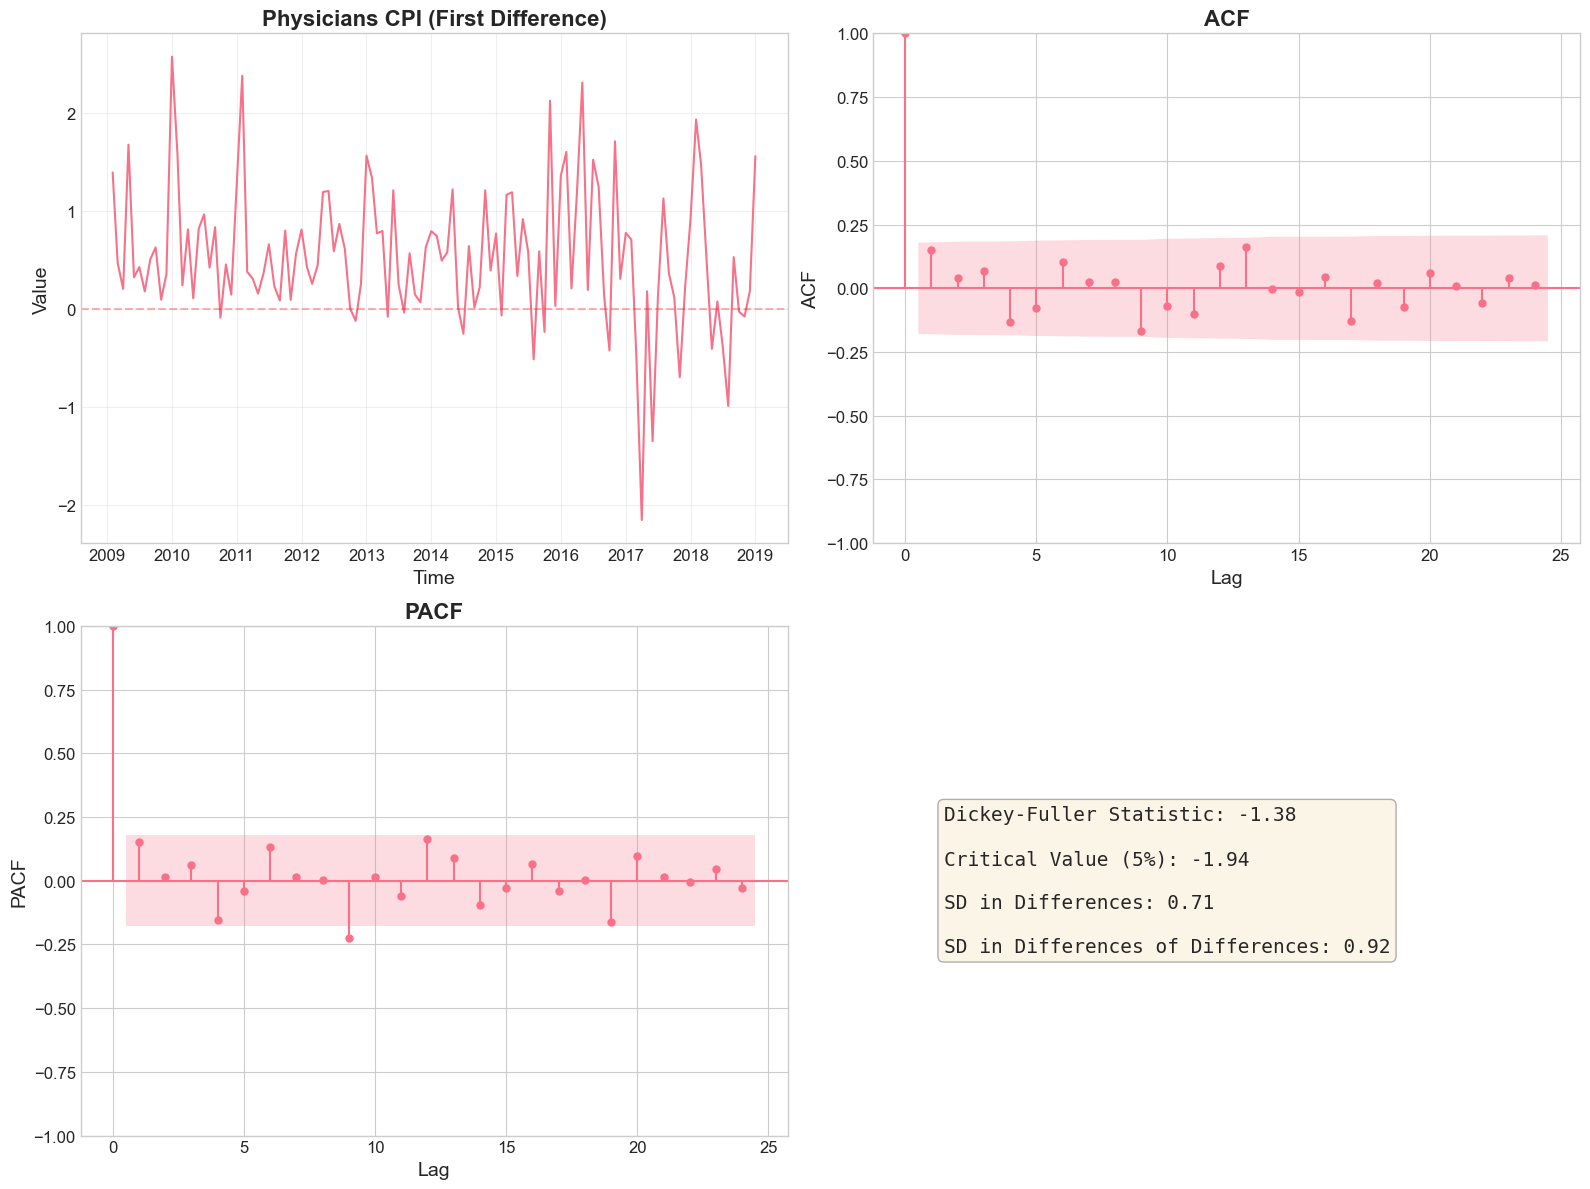


=== Augmented Dickey-Fuller Test Results (Physician CPI - First Difference) ===
ADF Statistic: -1.3780
P-value: 0.1564
Critical Values:
   1%: -2.5870
   5%: -1.9438
   10%: -1.6146

SD in Differences: 0.71
SD in Differences of Differences: 0.92


In [41]:
## One Difference - Physician CPI Analysis

# Calculate first difference
physician_diff = physician_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(physician_diff.index, physician_diff.values, linewidth=1.5)
ax1.set_title('Physicians CPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(physician_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(physician_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(physician_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(physician_diff)
sd_diff_of_diff = np.std(np.diff(physician_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Physician CPI - First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")

### 4. Overall CPI

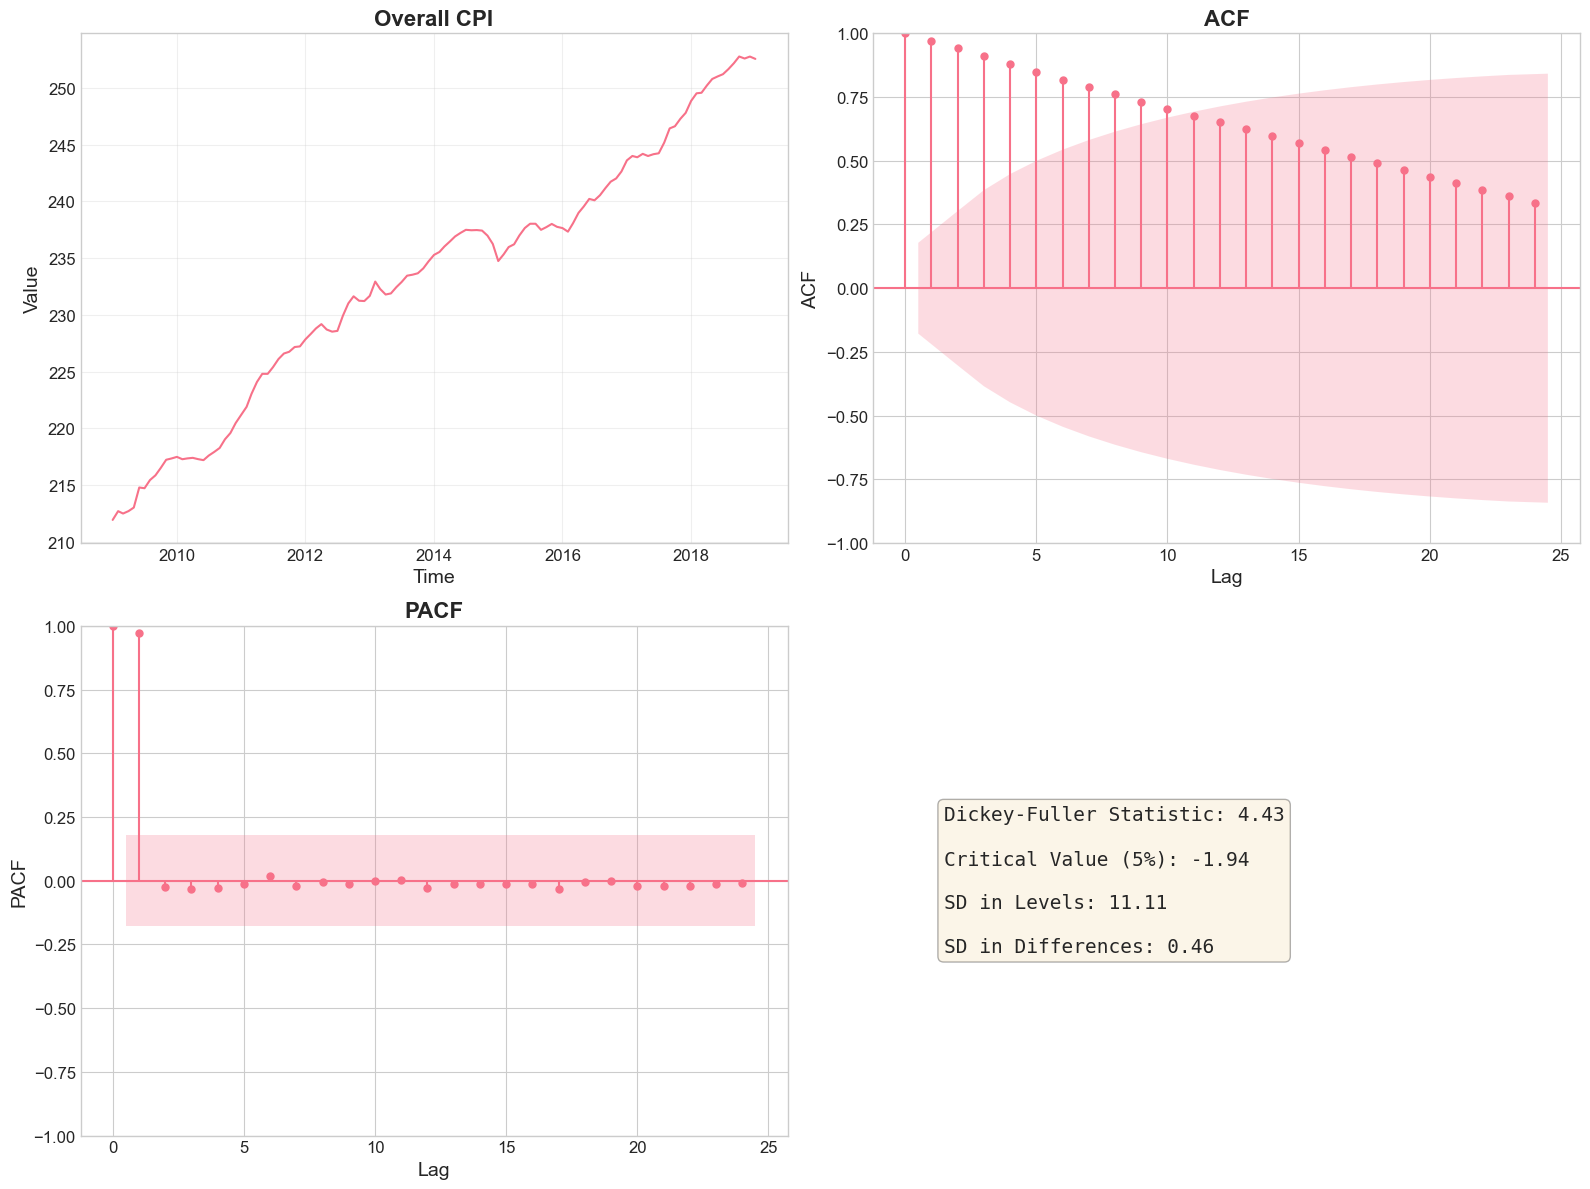


=== Augmented Dickey-Fuller Test Results (Overall CPI - Levels) ===
ADF Statistic: 4.4332
P-value: 1.0000
Critical Values:
   1%: -2.5848
   5%: -1.9435
   10%: -1.6148

SD in Levels: 11.11
SD in Differences: 0.46


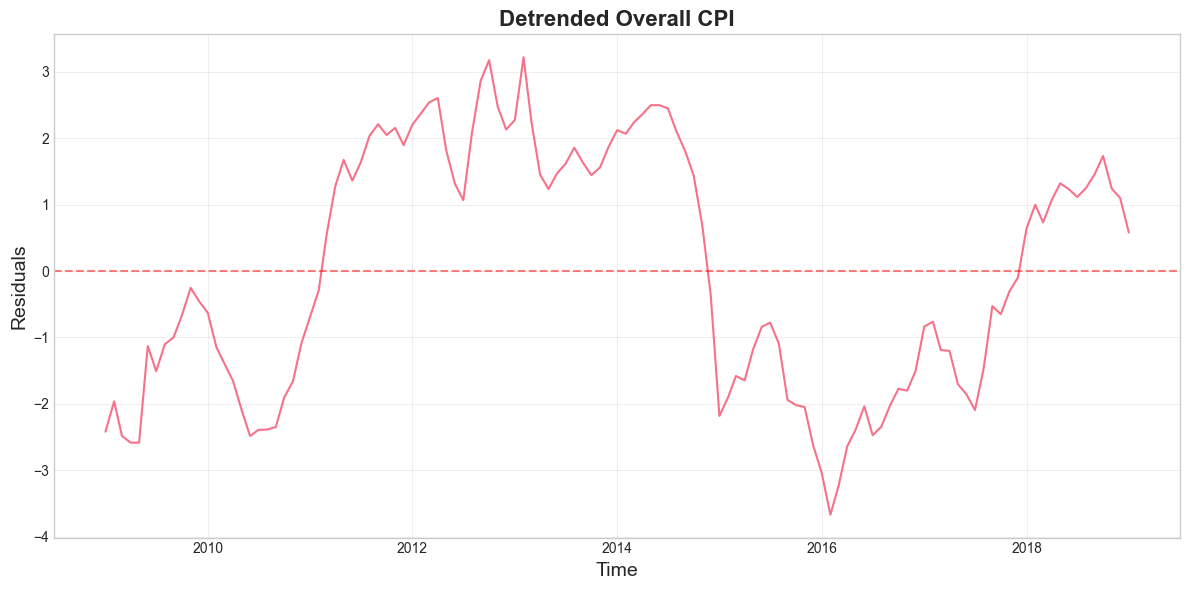

In [42]:
## Time series 4 - Overall CPI Analysis (Levels)

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(overall_ts.index, overall_ts.values, linewidth=1.5)
ax1.set_title('Overall CPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(overall_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(overall_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(overall_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(overall_ts.dropna())
sd_differences = np.std(np.diff(overall_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Overall CPI - Levels) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Levels: {sd_levels:.2f}")
print(f"SD in Differences: {sd_differences:.2f}")


# Linear Detrending for Overall CPI
time_index = np.arange(len(overall_ts))
valid_idx = ~overall_ts.isna()
time_clean = time_index[valid_idx]
values_clean = overall_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(overall_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Overall CPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Overall CPI (All Urban Consumers)

#### Stationarity Assessment

- **Visual Inspection:**  
  The raw series shows a clear upward trend and does not settle around a constant mean, indicating nonstationarity. The detrended plot also fails to appear stationary, reinforcing this conclusion.

- **Autocorrelation Function (ACF):**  
  The ACF exhibits a slow decay without quickly cutting off, indicating that past values have persistent influence, a hallmark of nonstationarity.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 4.43 (positive), so the null hypothesis of a unit root cannot be rejected. This shows the series behaves like a random walk, with shocks that persist over time.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 23.72, which is much greater than 0.5. This suggests stationarity by this metric, although this conflicts with the other evidence.

**Conclusion:**  
Based on visual analysis, ACF, and ADF tests, the Overall CPI series is nonstationary in levels, despite the standard deviation ratio suggesting otherwise. Differencing the series is necessary to achieve stationarity before further modeling.


### 4. Overall CPI (First Difference)

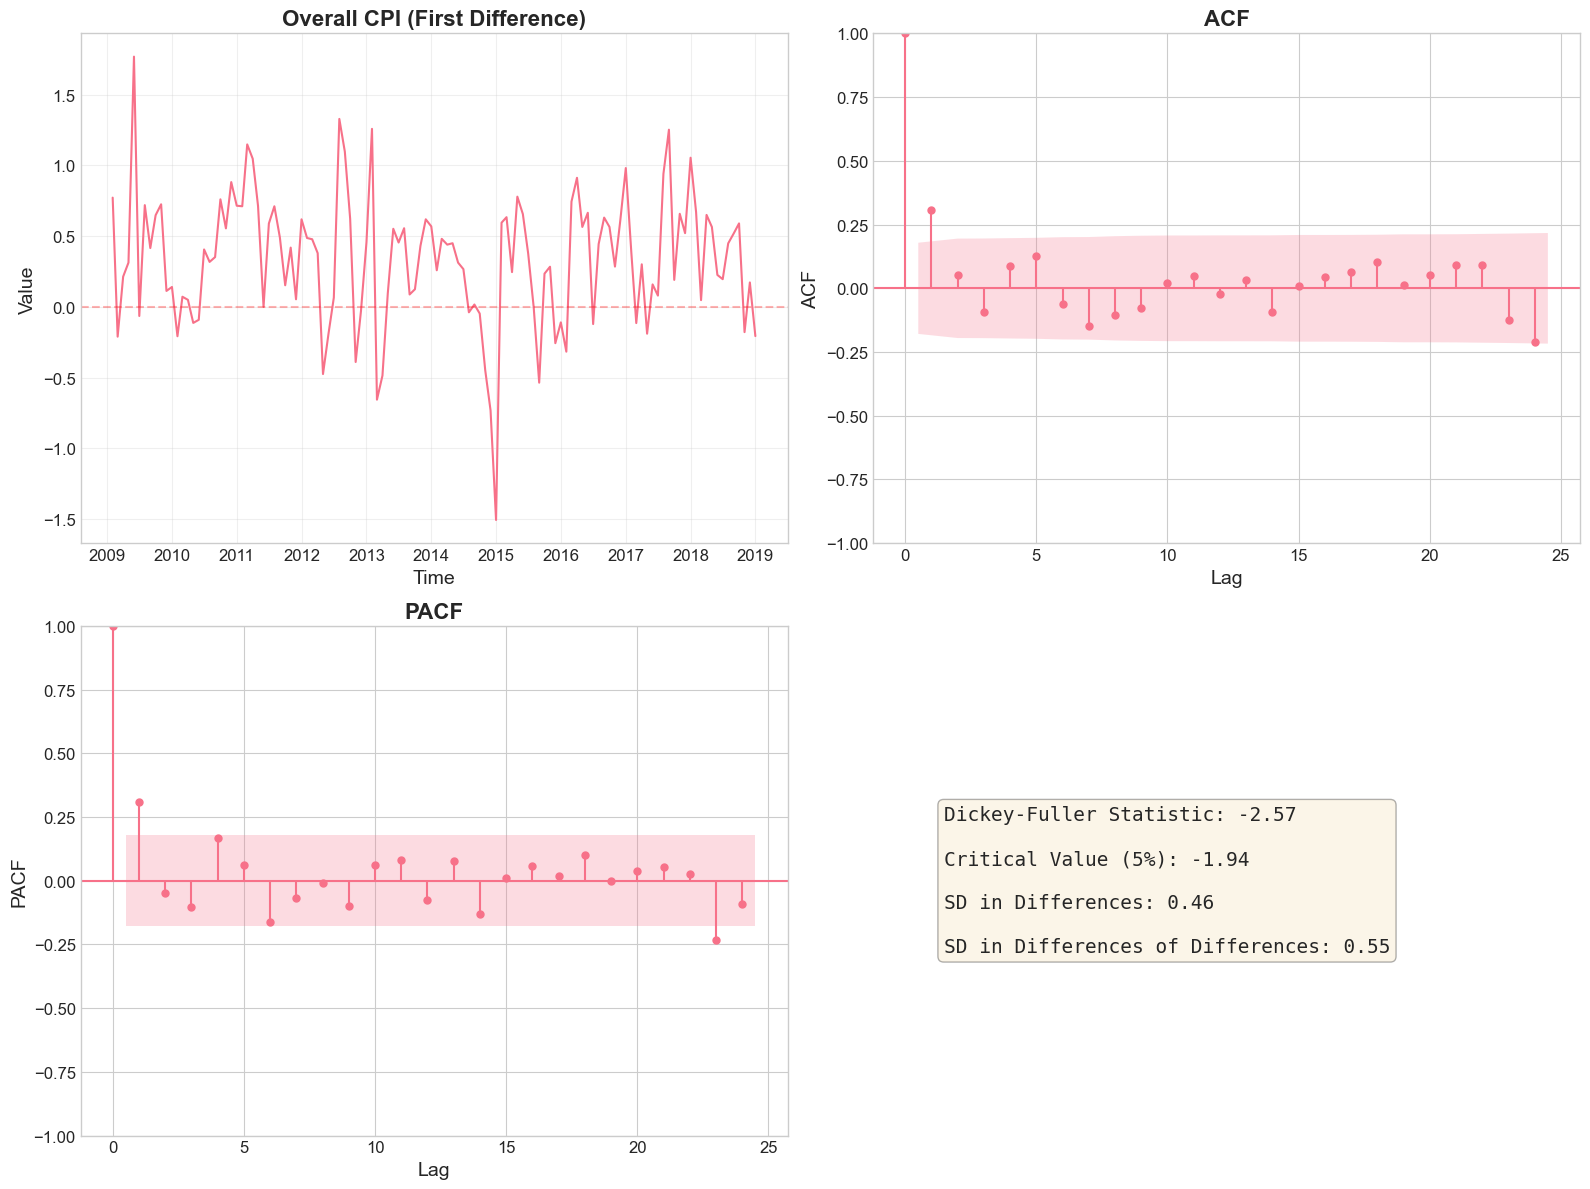


=== Augmented Dickey-Fuller Test Results (Overall CPI - First Difference) ===
ADF Statistic: -2.5729
P-value: 0.0098
Critical Values:
   1%: -2.5855
   5%: -1.9436
   10%: -1.6147

SD in Differences: 0.46
SD in Differences of Differences: 0.55


In [43]:
## One Difference - Overall CPI Analysis

# Calculate first difference
overall_diff = overall_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(overall_diff.index, overall_diff.values, linewidth=1.5)
ax1.set_title('Overall CPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(overall_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(overall_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(overall_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(overall_diff)
sd_diff_of_diff = np.std(np.diff(overall_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Overall CPI - First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")


#### Stationarity Assessment after First Differencing

- **Visual Inspection:**  
  After taking the first difference, the series fluctuates around a constant mean without a visible trend. The variance appears more stable, showing short-term ups and downs rather than persistent swings, consistent with stationarity and an integrated order one (I(1)) process.

- **Autocorrelation Function (ACF):**  
  The ACF of the differenced series drops off quickly, with correlations diminishing near zero after a few lags. This rapid decay indicates that past values have little lasting effect, consistent with stationarity after differencing.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is -4.45, which is well below critical values, allowing us to reject the null hypothesis of a unit root. This confirms that the series is stationary after first differencing and integrated of order one (I(1)). In other words, when examining the changes rather than levels, the series no longer drifts but fluctuates around a stable average.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 0.84. As this is close to 1 and greater than 0.5, it suggests the differenced series is stationary. The differenced data no longer drifts but instead oscillates around a consistent pattern.

**Conclusion:**  
All evidence confirms that the Overall CPI series becomes stationary after first differencing, making it suitable for further time series modeling and analysis.


## References

- Dickson, S. (2020). Association between the percentage of US drug sales subject to inflation penalties and the extent of drug price increases. *JAMA Network Open, 3*, e2016388. [https://doi.org/10.1001/jamanetworkopen.2020.16388](https://doi.org/10.1001/jamanetworkopen.2020.16388)
- Dunn, A., Grosse, S., & Zuvekas, S. (2018). Adjusting health expenditures for inflation: A review of measures for health services research in the United States. *Health Services Research, 53*, 175–196. [https://doi.org/10.1111/1475-6773.12612](https://doi.org/10.1111/1475-6773.12612)
- Mattingly, T. J. II, Anderson, G. F., Levy, J. F., & Mattingly, L. (2023). Comparison of price index methods and drug price inflation estimates for hepatitis C virus medications. *JAMA Health Forum, 4*. [https://doi.org/10.1001/jamahealthforum.2023.1317](https://doi.org/10.1001/jamahealthforum.2023.1317)
- Rajkumar, V. (2020). The high cost of prescription drugs: Causes and solutions. *Blood Cancer Journal, 10*, 33. [https://doi.org/10.1038/s41408-020-0338-x](https://doi.org/10.1038/s41408-020-0338-x)
- Reitsma, M., Dusetzina, S., Ballreich, J., Trujillo, A., & Mello, M. (2025). Estimated savings from extending prescription drug inflationary rebates to all commercial plans. *Health Affairs, 44*(3), 256–264. [https://doi.org/10.1377/hlthaff.2024.00724](https://doi.org/10.1377/hlthaff.2024.00724)
- Schumock, G., Li, E., Wiest, M., Suda, K., Stubbings, J., Matusiak, L., Hunkler, R., & Vermeulen, L. (2017). National trends in prescription drug expenditures and projections for 2017. *American Journal of Health-System Pharmacy, 74*(15), 1158–1173. [https://doi.org/10.2146/ajhp170164](https://doi.org/10.2146/ajhp170164)
- Shih, Y., Xu, Y., Liu, L., & Smieliauskas, F. (2017). Rising prices of targeted oral anticancer medications and associated financial burden on Medicare beneficiaries. *Journal of Clinical Oncology, 35*(22), 2482–2489. [https://doi.org/10.1200/JCO.2017.72.3742](https://doi.org/10.1200/JCO.2017.72.3742)
- Tichy, E., Hoffman, J., Tadrous, M., Rim, M., Suda, K., Cuéllar, S., Clark, J., Newell, M., & Schumock, G. (2023). National trends in prescription drug expenditures and projections for 2023. *American Journal of Health-System Pharmacy*. [https://doi.org/10.1093/ajhp/zxad086](https://doi.org/10.1093/ajhp/zxad086)
- Wagner, T., Westrich, K., Nordyke, R., & Campbell, J. (2024). Inflation-adjusted analysis of ICER’s unsupported price increase reports: Contextualizing drug spending changes. *Journal of Medical Economics, 27*, 1537–1541. [https://doi.org/10.1080/13696998.2024.2428109](https://doi.org/10.1080/13696998.2024.2428109)